In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from google.colab import files
from google.colab import drive
%matplotlib inline

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Problem Statement
Use a Neural Network Model to recognize two handwritten digits, zero and one.

In [2]:
x_path = '/content/drive/MyDrive/Colab Notebooks/X.txt'
with open(x_path, 'r') as f:
    X_text = f.read()

In [3]:
y_path = '/content/drive/MyDrive/Colab Notebooks/y.txt'
with open(y_path, 'r') as f:
    y_text = f.read()

In [4]:
# Load the data
X = np.loadtxt(x_path, delimiter=",")
y = np.loadtxt(y_path).reshape(-1, 1).astype(int)

In [5]:
print ('The first element of X is: ', X[0])

The first element of X is:  [ 0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
  0.000000e+00  0.000000e+00  9.000000e-06  2.000

In [6]:
print ('The first element of y is: ', y[0,0])
print ('The last element of y is: ', y[-1,0])

The first element of y is:  0
The last element of y is:  1


In [7]:
print ('The shape of X is: ' + str(X.shape))
print ('The shape of y is: ' + str(y.shape))

The shape of X is: (1000, 400)
The shape of y is: (1000, 1)


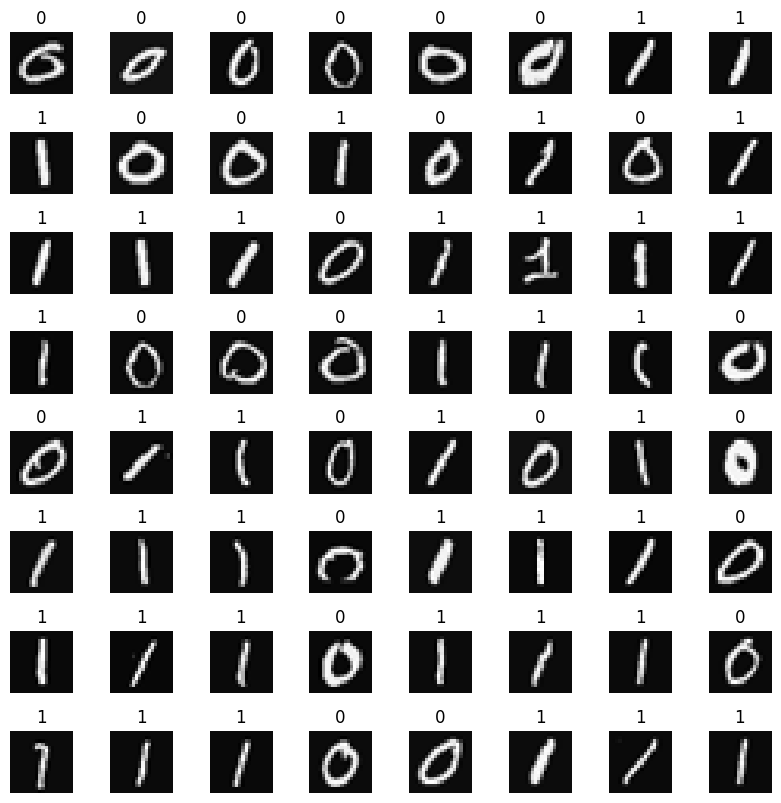

In [8]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    random_index = np.random.randint(m)

    X_random_reshaped = X[random_index].reshape((20,20)).T

    ax.imshow(X_random_reshaped, cmap='gray')

    ax.set_title(y[random_index,0])
    ax.set_axis_off()

## Model representation
- Our Model has three dense layers with sigmoid activations.

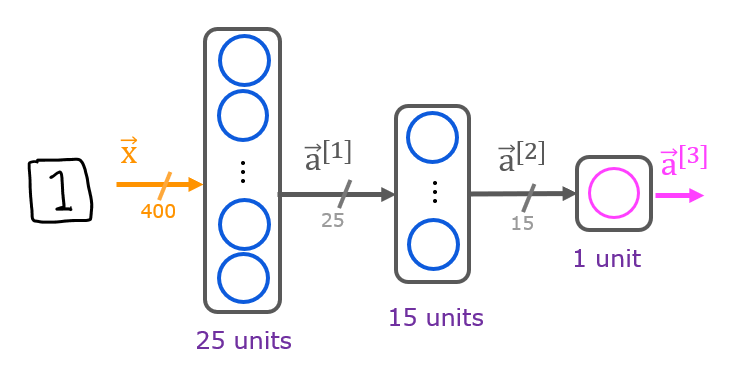


- If network has $s_{in}$ units in a layer and $s_{out}$ units in the next layer, then
   - $W$ will be of dimension $s_{in} \times s_{out}$.
   - $b$ will a vector with $s_{out}$ elements
  
- Therefore, the shapes of `W`, and `b`,  are
    - layer1: The shape of `W1` is (400, 25) and the shape of `b1` is (25,)
    - layer2: The shape of `W2` is (25, 15) and the shape of `b2` is: (15,)
    - layer3: The shape of `W3` is (15, 1) and the shape of `b3` is: (1,)
-The bias vector `b` could be represented as a 1-D (n,) or 2-D (1,n) array.
               

**Construct the network described above using Keras Sequential model and Dense Layer with a sigmoid activation**

In [10]:
model = Sequential(
    [
        tf.keras.Input(shape=(400,)),
        Dense(25, activation='sigmoid'),
        Dense(15, activation='sigmoid'),
        Dense(1,  activation='sigmoid')

    ], name = "my_model"
)

In [11]:
model.summary()

Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 25)             │        10,025 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 15)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,431 (40.75 KB)

 Trainable params: 10,431 (40.75 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
[layer1, layer2, layer3] = model.layers

In [13]:
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 1), b3 shape = (1,)


**Define a loss function and run gradient descent to fit the weights of the model to the training data.**

In [14]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

model.fit(
    X,y,
    epochs=20
)

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.7358
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5814
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4476
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3208
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2311
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1784
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1397
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1115
Epoch 9/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0936
Epoch 10/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0782
Epoch 11/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0649
Epoch 12/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0616
Epoch 13/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0520
Epoch 14/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0521
Epoch 15/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0453
Epoch 16/20
32/32 ━

In [15]:
prediction = model.predict(X[0].reshape(1,400))  # a zero
print(f" predicting a zero: {prediction}")
prediction = model.predict(X[500].reshape(1,400))  # a one
print(f" predicting a one:  {prediction}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
 predicting a zero: [[0.03471768]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
 predicting a one:  [[0.9880714]]


In [16]:
if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
print(f"prediction after threshold: {yhat}")

prediction after threshold: 1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━

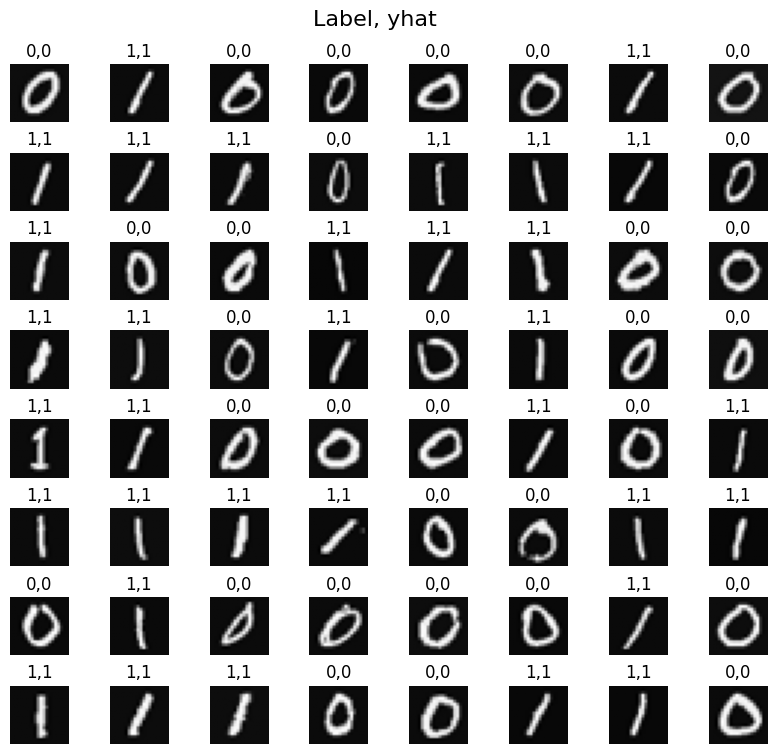

In [17]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1,rect=[0, 0.03, 1, 0.92])

for i,ax in enumerate(axes.flat):
    random_index = np.random.randint(m)

    X_random_reshaped = X[random_index].reshape((20,20)).T

    ax.imshow(X_random_reshaped, cmap='gray')

    prediction = model.predict(X[random_index].reshape(1,400))
    if prediction >= 0.5:
        yhat = 1
    else:
        yhat = 0

    ax.set_title(f"{y[random_index,0]},{yhat}")
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=16)
plt.show()